In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np

In [ ]:
DFusdrub = pd.read_csv("USDRUB_dataset.csv", decimal=',')

DFusdrub['Дата'] = pd.to_datetime(DFusdrub['Дата'], dayfirst=True)
DFusdrub['Цена'] = DFusdrub['Цена'].astype(float)
DFusdrub = DFusdrub[['Дата','Цена']]
DFusdrub

DFusdrub.set_index('Дата', inplace=True)

#DFusdrub.index.min()
DRusdrub = pd.date_range(start='2013.01.01', end='2024.04.30')

new_DFusdrub = pd.DataFrame(index=DRusdrub)

merged_DFusdrub = new_DFusdrub.join(DFusdrub)
merged_DFusdrub
interpolated1 = merged_DFusdrub.interpolate(method='linear')
interpolated1.reset_index(inplace=True)
DataUSDRUB = interpolated1

DataUSDRUB['index'] = pd.to_datetime(DataUSDRUB['index'], format='mixed')
DataUSDRUB.set_index('index', inplace=True)
DataUSDRUB

,Цена
index,
2013-01-01,30.58800
2013-01-02,30.17500
2013-01-03,30.25000
2013-01-04,30.32800
2013-01-05,30.33500
...,...
2024-04-26,91.72000
2024-04-27,92.39750
2024-04-28,92.69875


In [ ]:
DFsales2 = pd.read_csv("salesTwoRoom.csv", delimiter=';', decimal=',')
DFsales2

,datec,CountContracts,ActiveCount,AverageSpacedesign
0,2013-01-01,0,0,0.0000000000
1,2013-01-02,0,0,0.0000000000
2,2013-01-03,0,0,0.0000000000
3,2013-01-04,0,19,0.0000000000
4,2013-01-05,0,18,0.0000000000
...,...,...,...,...
4133,2024-04-26,3,14,61.7666666666
4134,2024-04-27,0,9,0.0000000000
4135,2024-04-28,0,10,0.0000000000
4136,2024-04-29,0,3,0.0000000000


In [ ]:
DFcalls = pd.read_csv("callsOneRoom.csv", delimiter=';', decimal=',')
DFcalls2 = pd.read_csv("callsTwoRoom.csv", delimiter=';', decimal=',')
DFcalls3 = pd.read_csv("callsThreeRoom.csv", delimiter=';', decimal=',')
DFcalls2.rename(columns={'c': 'calls2'}, inplace=True)
DFcalls3.rename(columns={'c': 'calls3'}, inplace=True)
DFcalls = DFcalls.fillna(0)
DFcalls2 = DFcalls2.fillna(0)
DFcalls3 = DFcalls3.fillna(0)
DFcalls['dt'] = pd.to_datetime(DFcalls['dt'], format='mixed')
DFcalls2['dt'] = pd.to_datetime(DFcalls2['dt'], format='mixed')
DFcalls3['dt'] = pd.to_datetime(DFcalls3['dt'], format='mixed')
DFcalls.set_index('dt', inplace=True)
DFcalls2.set_index('dt', inplace=True)
DFcalls3.set_index('dt', inplace=True)

DFremains = pd.read_csv("remainsOneRoom.csv", delimiter=';', decimal=',')
DFremains2 = pd.read_csv("remainsTwoRoom.csv", delimiter=';', decimal=',')
DFremains3 = pd.read_csv("remainsThreeRoom.csv", delimiter=';', decimal=',')
DFremains = DFremains.fillna(0)
DFremains2 = DFremains2.fillna(0)
DFremains3 = DFremains3.fillna(0)
DFremains['Date'] = pd.to_datetime(DFremains['Date'], format='mixed')
DFremains2['Date'] = pd.to_datetime(DFremains2['Date'], format='mixed')
DFremains3['Date'] = pd.to_datetime(DFremains3['Date'], format='mixed')
DFremains.set_index('Date', inplace=True)
DFremains2.set_index('Date', inplace=True)
DFremains3.set_index('Date', inplace=True)
DFremains = DFremains[['tisa_FloorminMore37', 'tisa_FloormaxMore37', 'tisa_FlooravgMore37', 'tisa_QuantityavgMore37', 'OneRoomRemainMore37', 'OneRoomRemainLess37']]
#DFremains['relRemain'] = DFremains['OneRoomRemainMore37'] / (DFremains['OneRoomRemainMore37'] + DFremains['OneRoomRemainLess37'] )


DFsales = pd.read_csv("salesOneRoom.csv", delimiter=';', decimal=',')
DFsales2 = pd.read_csv("salesTwoRoom.csv", delimiter=';', decimal=',')
DFsales3 = pd.read_csv("salesThreeRoom.csv", delimiter=';', decimal=',')
DFsales2.rename(columns={'CountContracts': 'CountContracts2'}, inplace=True)
DFsales2.rename(columns={'ActiveCount': 'del'}, inplace=True)
DFsales2.rename(columns={'AverageSpacedesign': 'AverageSpacedesign2'}, inplace=True)
DFsales3.rename(columns={'CountContracts': 'CountContracts3'}, inplace=True)
DFsales3.rename(columns={'ActiveCount': 'del'}, inplace=True)
DFsales3.rename(columns={'AverageSpacedesign': 'AverageSpacedesign3'}, inplace=True)
DFsales['datec'] = pd.to_datetime(DFsales['datec'], format='mixed')
DFsales2['datec'] = pd.to_datetime(DFsales2['datec'], format='mixed')
DFsales3['datec'] = pd.to_datetime(DFsales3['datec'], format='mixed')
DFsales.set_index('datec', inplace=True)
DFsales2.set_index('datec', inplace=True)
DFsales3.set_index('datec', inplace=True)



T1 = pd.concat([DFsales, DFsales2, DFsales3,  DFremains,DFremains2,DFremains3, DFcalls, DFcalls2, DFcalls3], axis=1)
T1 = T1.drop('del', axis=1)
T1

,CountContracts,ActiveCount,AverageSpacedesign,CountContracts2,AverageSpacedesign2,CountContracts3,AverageSpacedesign3,tisa_FloorminMore37,tisa_FloormaxMore37,tisa_FlooravgMore37,...,TwoRoomQuantityavg,TwoRoomRemain,ThreeRoomFloormin,ThreeRoomFloormax,ThreeRoomFlooravg,ThreeRoomQuantityavg,ThreeRoomRemain,c,calls2,calls3
2013-01-01,0,0,0.0000000000,0,0.0000000000,0,0.0000000000,1,23,8,...,76.3762525879,483,1,25,8,114.1104750000,400,0.0,0.0,0.0
2013-01-02,0,0,0.0000000000,0,0.0000000000,0,0.0000000000,1,23,8,...,76.3762525879,483,1,25,8,114.1104750000,400,0.0,0.0,0.0
2013-01-03,0,0,0.0000000000,0,0.0000000000,0,0.0000000000,1,23,8,...,76.3762525879,483,1,25,8,114.1104750000,400,0.0,0.0,0.0
2013-01-04,0,19,0.0000000000,0,0.0000000000,0,0.0000000000,1,23,8,...,76.3762525879,483,1,25,8,114.1104750000,400,13.0,14.0,4.0
2013-01-05,0,18,0.0000000000,0,0.0000000000,0,0.0000000000,1,23,8,...,76.3762525879,483,1,25,8,114.1104750000,400,15.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,0,14,0.0000000000,3,61.7666666666,0,0.0000000000,2,25,12,...,76.3583333333,108,2,25,10,97.7893518518,216,1.0,0.0,0.0
2024-04-27,1,9,44.7000000000,0,0.0000000000,3,88.8000000000,2,25,12,...,76.3583333333,108,2,25,10,97.9159624413,213,0.0,2.0,0.0
2024-04-28,0,10,0.0000000000,0,0.0000000000,0,0.0000000000,2,25,12,...,76.3583333333,108,2,25,10,97.9159624413,213,2.0,1.0,0.0
2024-04-29,0,3,0.0000000000,0,0.0000000000,0,0.0000000000,2,25,12,...,76.3583333333,108,2,25,10,97.9159624413,213,0.0,0.0,0.0


In [ ]:
T1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CountContracts,4138.0,0.536491,0.972798,0.0,0.00,0.0,1.00,13.0
ActiveCount,4138.0,14.979217,28.031864,0.0,0.00,5.0,18.00,474.0
CountContracts2,4138.0,0.552199,0.952995,0.0,0.00,0.0,1.00,9.0
CountContracts3,4138.0,0.429676,0.856664,0.0,0.00,0.0,1.00,25.0
tisa_FloorminMore37,4138.0,1.194780,0.396079,1.0,1.00,1.0,1.00,2.0
tisa_FloormaxMore37,4138.0,27.199372,1.524636,23.0,28.00,28.0,28.00,28.0
tisa_FlooravgMore37,4138.0,10.734413,1.294932,8.0,10.00,11.0,12.00,13.0
OneRoomRemainMore37,4138.0,531.604157,233.896909,159.0,287.00,542.0,761.00,919.0
OneRoomRemainLess37,4138.0,539.768246,323.575836,33.0,211.00,599.0,811.00,1149.0
TwoRoomFloormin,4138.0,1.211938,0.408731,1.0,1.00,1.0,1.00,2.0


In [ ]:
def get_rate(frm, to):
  headers = {'content-type': 'text/xml'}
  body = '<soap:Envelope xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/">' \
' <soap:Body> <KeyRateXML xmlns="http://web.cbr.ru/">' \
f' <fromDate>{frm}</fromDate> <ToDate>{to}</ToDate>' \
' </KeyRateXML> </soap:Body> </soap:Envelope>'
  response = requests.post('https://www.cbr.ru/DailyInfoWebServ/DailyInfo.asmx', data=body,headers=headers)
  try:
    dt_list = [pd.to_datetime(x.split('</DT>')[0]) for x in response.text.split('<DT>')[1:]]
    keyrate = [x.split('</Rate>')[0] for x in response.text.split('<Rate>')[1:]]
    keyrate = dict(zip(dt_list, keyrate))

  except Exception as e:
    keyrate = None
    print(e)
  return keyrate


In [ ]:
res = get_rate('2013-01-01', '2024-04-30')



In [ ]:
new_dict = {}
for key, value in res.items():
    new_key = key.to_pydatetime().date()  # Преобразование Timestamp в дату без учета временных зон
    new_value = float(value)  # Преобразование строки в число
    new_dict[new_key] = new_value

# Создание DataFrame из преобразованного словаря
df = pd.DataFrame(new_dict.items(), columns=['dt', 'kr'])
df


,dt,kr
0,2024-04-30,16.0
1,2024-04-29,16.0
2,2024-04-27,16.0
3,2024-04-26,16.0
4,2024-04-25,16.0
...,...,...
2649,2013-09-23,5.5
2650,2013-09-20,5.5
2651,2013-09-19,5.5
2652,2013-09-18,5.5


In [ ]:
df.set_index('dt', inplace=True)

DR = pd.date_range(start='2013.01.01', end='2024.04.30')

new_DF = pd.DataFrame(index=DR)

merged_DF = new_DF.join(df)
merged_DF.iloc[0] = 5.5
interpolated = merged_DF.interpolate(method='linear')
interpolated.reset_index(inplace=True)
interpolated.rename(columns={'index':'dt'}, inplace=True)
interpolated['dt'] = pd.to_datetime(interpolated['dt'], format='mixed')
interpolated['kr'] = interpolated['kr'].astype(float)

interpolated['dt'] = pd.to_datetime(interpolated['dt'], format='mixed')
interpolated.set_index('dt', inplace=True)
interpolated

,kr
dt,
2013-01-01,5.5
2013-01-02,5.5
2013-01-03,5.5
2013-01-04,5.5
2013-01-05,5.5
...,...
2024-04-26,16.0
2024-04-27,16.0
2024-04-28,16.0


In [ ]:
SS = pd.concat([T1, interpolated, DataUSDRUB], axis=1)

SS

,CountContracts,ActiveCount,AverageSpacedesign,CountContracts2,AverageSpacedesign2,CountContracts3,AverageSpacedesign3,tisa_FloorminMore37,tisa_FloormaxMore37,tisa_FlooravgMore37,...,ThreeRoomFloormin,ThreeRoomFloormax,ThreeRoomFlooravg,ThreeRoomQuantityavg,ThreeRoomRemain,c,calls2,calls3,kr,Цена
2013-01-01,0,0,0.0000000000,0,0.0000000000,0,0.0000000000,1,23,8,...,1,25,8,114.1104750000,400,0.0,0.0,0.0,5.5,30.58800
2013-01-02,0,0,0.0000000000,0,0.0000000000,0,0.0000000000,1,23,8,...,1,25,8,114.1104750000,400,0.0,0.0,0.0,5.5,30.17500
2013-01-03,0,0,0.0000000000,0,0.0000000000,0,0.0000000000,1,23,8,...,1,25,8,114.1104750000,400,0.0,0.0,0.0,5.5,30.25000
2013-01-04,0,19,0.0000000000,0,0.0000000000,0,0.0000000000,1,23,8,...,1,25,8,114.1104750000,400,13.0,14.0,4.0,5.5,30.32800
2013-01-05,0,18,0.0000000000,0,0.0000000000,0,0.0000000000,1,23,8,...,1,25,8,114.1104750000,400,15.0,6.0,5.0,5.5,30.33500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,0,14,0.0000000000,3,61.7666666666,0,0.0000000000,2,25,12,...,2,25,10,97.7893518518,216,1.0,0.0,0.0,16.0,91.72000
2024-04-27,1,9,44.7000000000,0,0.0000000000,3,88.8000000000,2,25,12,...,2,25,10,97.9159624413,213,0.0,2.0,0.0,16.0,92.39750
2024-04-28,0,10,0.0000000000,0,0.0000000000,0,0.0000000000,2,25,12,...,2,25,10,97.9159624413,213,2.0,1.0,0.0,16.0,92.69875
2024-04-29,0,3,0.0000000000,0,0.0000000000,0,0.0000000000,2,25,12,...,2,25,10,97.9159624413,213,0.0,0.0,0.0,16.0,93.00000


In [ ]:
SS


,CountContracts,ActiveCount,AverageSpacedesign,tisa_FloorminMore37,tisa_FloormaxMore37,tisa_FlooravgMore37,tisa_QuantityavgMore37,OneRoomRemainMore37,OneRoomRemainLess37,relRemain,c,kr,Цена
2013-01-01,0,0,0.0000000000,1,23,8,45.5138095238,357,207,0.632979,0.0,5.5,30.58800
2013-01-02,0,0,0.0000000000,1,23,8,45.5138095238,357,207,0.632979,0.0,5.5,30.17500
2013-01-03,0,0,0.0000000000,1,23,8,45.5138095238,357,207,0.632979,0.0,5.5,30.25000
2013-01-04,0,19,0.0000000000,1,23,8,45.5138095238,357,207,0.632979,13.0,5.5,30.32800
2013-01-05,0,18,0.0000000000,1,23,8,45.5138095238,357,207,0.632979,15.0,5.5,30.33500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,0,14,0.0000000000,2,25,12,42.9472049689,161,34,0.825641,1.0,16.0,91.72000
2024-04-27,1,9,44.7000000000,2,25,12,42.9362500000,160,33,0.829016,0.0,16.0,92.39750
2024-04-28,0,10,0.0000000000,2,25,12,42.9362500000,160,33,0.829016,2.0,16.0,92.69875
2024-04-29,0,3,0.0000000000,2,25,12,42.9362500000,160,33,0.829016,0.0,16.0,93.00000


In [ ]:
SS = SS.astype(np.float32)

In [ ]:
# Извлекаем 3-й столбец (индекс 2)
col = SS.pop('CountContracts2')

# Вставляем столбец на новую позицию (индекс 1)
SS.insert(1, 'CountContracts2', col)

# Извлекаем 3-й столбец (индекс 2)
col = SS.pop('CountContracts3')

# Вставляем столбец на новую позицию (индекс 1)
SS.insert(2, 'CountContracts3', col)

In [ ]:
SS.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CountContracts,4138.0,0.536491,0.972798,0.000000,0.000000,0.000000,1.000000,13.000000
CountContracts2,4138.0,0.552199,0.952995,0.000000,0.000000,0.000000,1.000000,9.000000
CountContracts3,4138.0,0.429676,0.856664,0.000000,0.000000,0.000000,1.000000,25.000000
ActiveCount,4138.0,14.979217,28.031864,0.000000,0.000000,5.000000,18.000000,474.000000
AverageSpacedesign,4138.0,13.667277,20.537304,0.000000,0.000000,0.000000,39.941250,82.199997
AverageSpacedesign2,4138.0,22.506252,33.506546,0.000000,0.000000,0.000000,59.900002,253.100006
AverageSpacedesign3,4138.0,30.482994,49.022629,0.000000,0.000000,0.000000,80.745832,237.300003
tisa_FloorminMore37,4138.0,1.194780,0.396079,1.000000,1.000000,1.000000,1.000000,2.000000
tisa_FloormaxMore37,4138.0,27.199371,1.524636,23.000000,28.000000,28.000000,28.000000,28.000000
tisa_FlooravgMore37,4138.0,10.734413,1.294932,8.000000,10.000000,11.000000,12.000000,13.000000


In [ ]:
SS

,CountContracts,CountContracts2,CountContracts3,ActiveCount,AverageSpacedesign,AverageSpacedesign2,AverageSpacedesign3,tisa_FloorminMore37,tisa_FloormaxMore37,tisa_FlooravgMore37,...,ThreeRoomFloormin,ThreeRoomFloormax,ThreeRoomFlooravg,ThreeRoomQuantityavg,ThreeRoomRemain,c,calls2,calls3,kr,Цена
2013-01-01,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,23.0,8.0,...,1.0,25.0,8.0,114.110474,400.0,0.0,0.0,0.0,5.5,30.587999
2013-01-02,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,23.0,8.0,...,1.0,25.0,8.0,114.110474,400.0,0.0,0.0,0.0,5.5,30.174999
2013-01-03,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,23.0,8.0,...,1.0,25.0,8.0,114.110474,400.0,0.0,0.0,0.0,5.5,30.250000
2013-01-04,0.0,0.0,0.0,19.0,0.000000,0.000000,0.000000,1.0,23.0,8.0,...,1.0,25.0,8.0,114.110474,400.0,13.0,14.0,4.0,5.5,30.327999
2013-01-05,0.0,0.0,0.0,18.0,0.000000,0.000000,0.000000,1.0,23.0,8.0,...,1.0,25.0,8.0,114.110474,400.0,15.0,6.0,5.0,5.5,30.334999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,0.0,3.0,0.0,14.0,0.000000,61.766666,0.000000,2.0,25.0,12.0,...,2.0,25.0,10.0,97.789352,216.0,1.0,0.0,0.0,16.0,91.720001
2024-04-27,1.0,0.0,3.0,9.0,44.700001,0.000000,88.800003,2.0,25.0,12.0,...,2.0,25.0,10.0,97.915962,213.0,0.0,2.0,0.0,16.0,92.397499
2024-04-28,0.0,0.0,0.0,10.0,0.000000,0.000000,0.000000,2.0,25.0,12.0,...,2.0,25.0,10.0,97.915962,213.0,2.0,1.0,0.0,16.0,92.698753
2024-04-29,0.0,0.0,0.0,3.0,0.000000,0.000000,0.000000,2.0,25.0,12.0,...,2.0,25.0,10.0,97.915962,213.0,0.0,0.0,0.0,16.0,93.000000


In [ ]:
SS.to_csv('test.csv', index=True)

In [ ]:
# Функция для обнаружения выбросов с использованием IQR
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    Q1 = df['c'].quantile(0.25)
    Q3 = df['c'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers['c'] = df['c'].apply(lambda x: True if x < lower_bound or x > upper_bound else False)
    return outliers

In [ ]:
detect_outliers_iqr(SS)

,c
2013-01-01,False
2013-01-02,False
2013-01-03,False
2013-01-04,False
2013-01-05,False
...,...
2024-04-26,False
2024-04-27,False
2024-04-28,False
2024-04-29,False


Изменение средней цены в доллар за метр квадратный

Заключенные договора в метрах

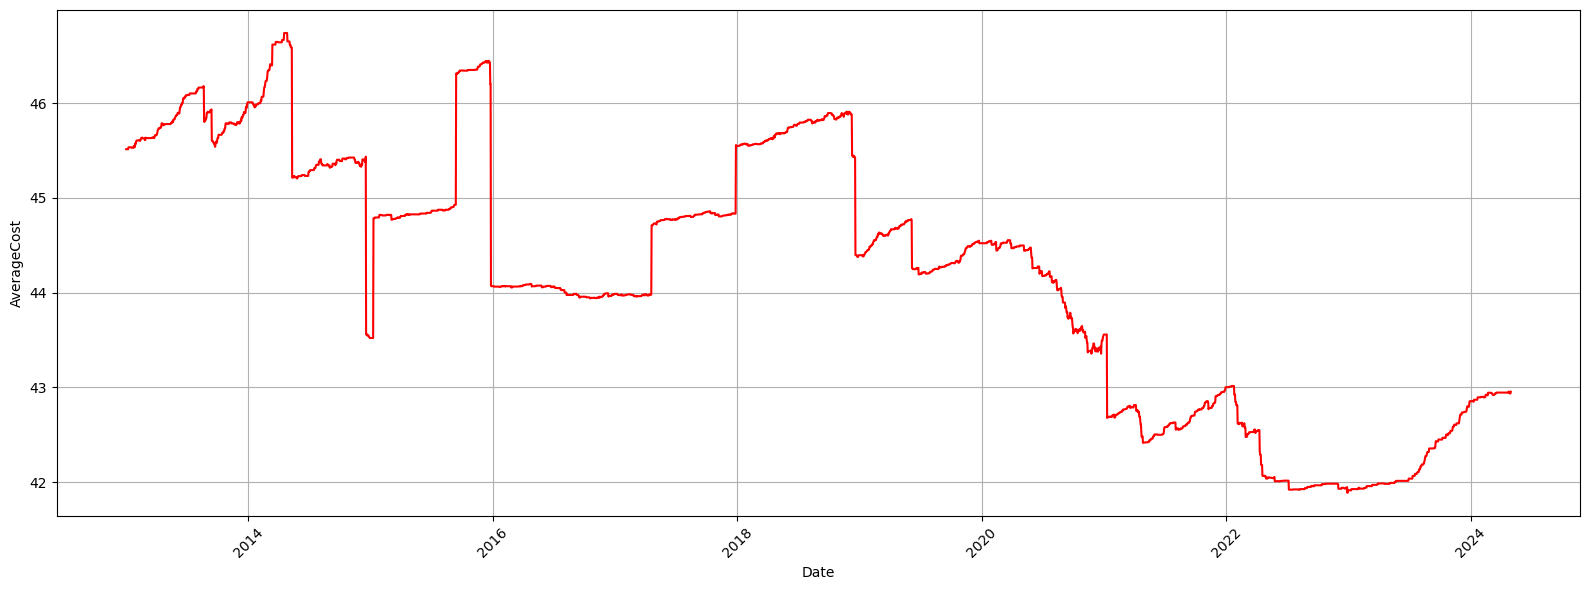

In [ ]:
Temp = SS[['tisa_QuantityavgMore37']]
Temp1 = SS[['c']]
plt.figure(figsize=(16,6))
#plt.plot(Temp['dt'], Temp['tisa_spacedesign'], marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('AverageCost')

plt.xticks(rotation=45)
smoothed = Temp
#smoothed2 = Temp1['c'].rolling(window=40).mean()
#smoothed3 = Temp2['AverageCostContractUSD'].rolling(window=40).mean()
plt.plot( smoothed, marker='', linestyle='-', color='red')
#plt.plot( smoothed2, marker='', linestyle='-', color='blue')
plt.grid(True)
plt.tight_layout()
plt.show()

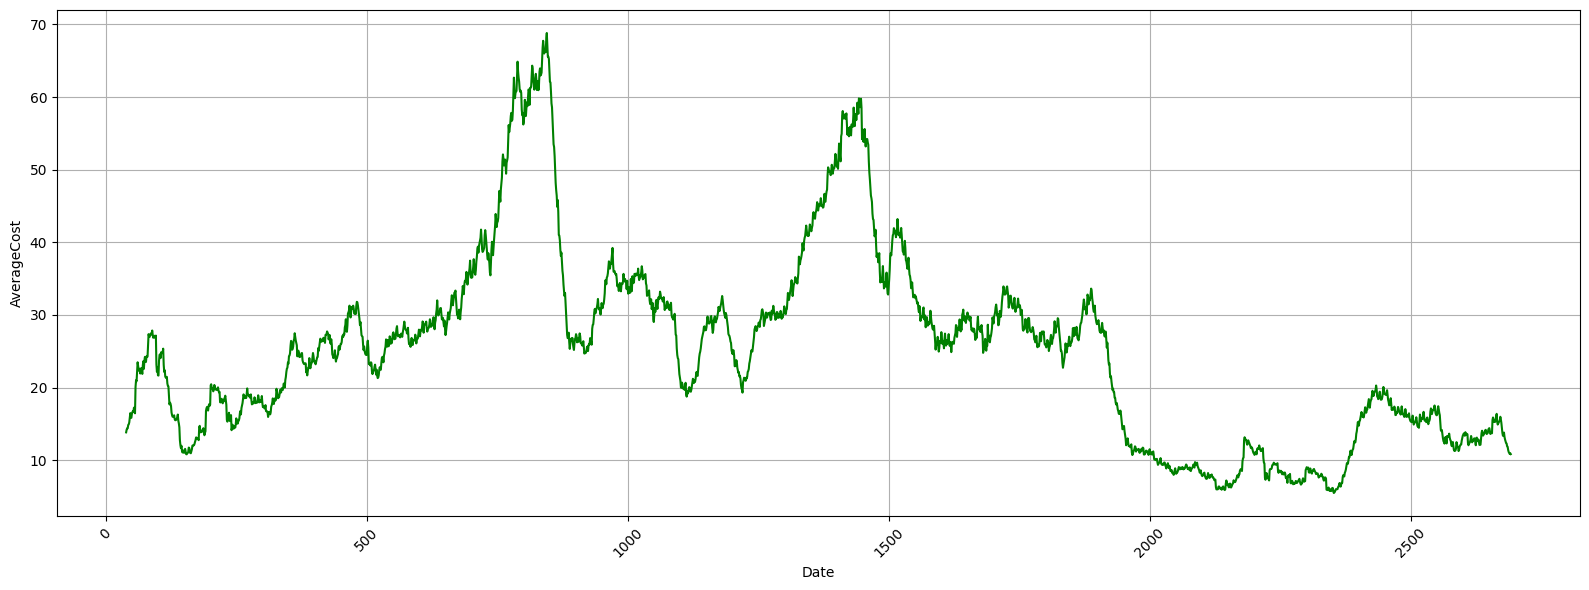

In [ ]:
Temp = SS[['ActiveCount']]
Temp1 = SS[['countCalls']]
Temp2 = SS[['Kbron']]
plt.figure(figsize=(16,6))
#plt.plot(Temp['dt'], Temp['tisa_spacedesign'], marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('AverageCost')

plt.xticks(rotation=45)
smoothed3 = Temp2['Kbron'].rolling(window=40).mean()

plt.plot( smoothed3, marker='', linestyle='-', color='green')
plt.grid(True)
plt.tight_layout()
plt.show()

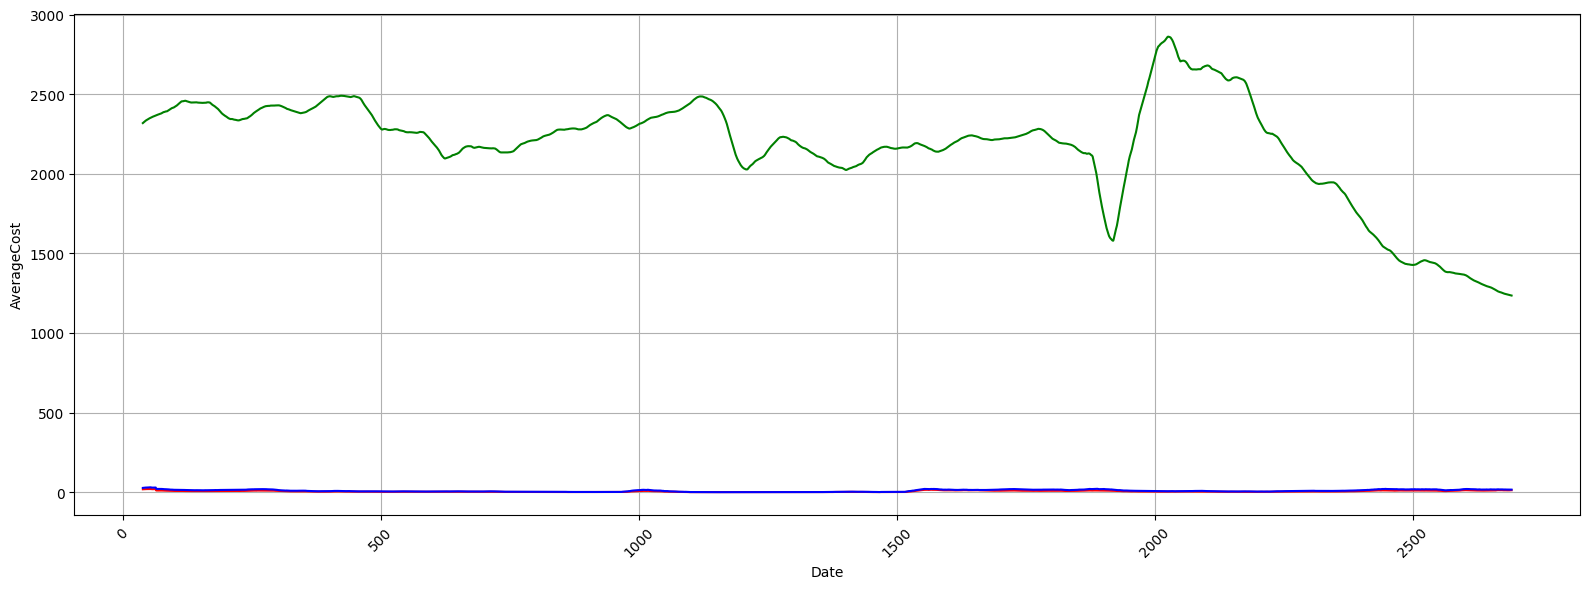

In [ ]:
Temp = SS[['ActiveCount']]
Temp1 = SS[['countCalls']]
Temp2 = SS[['AverageCostContractUSD']]
plt.figure(figsize=(16,6))
#plt.plot(Temp['dt'], Temp['tisa_spacedesign'], marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('AverageCost')

plt.xticks(rotation=45)
smoothed3 = Temp2['AverageCostContractUSD'].rolling(window=40).mean()
plt.plot( smoothed, marker='', linestyle='-', color='red')
plt.plot( smoothed2, marker='', linestyle='-', color='blue')
plt.plot( smoothed3, marker='', linestyle='-', color='green')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
Temp = SS[['dt','CountContracts']]
Temp

KeyError: "['dt'] not in index"

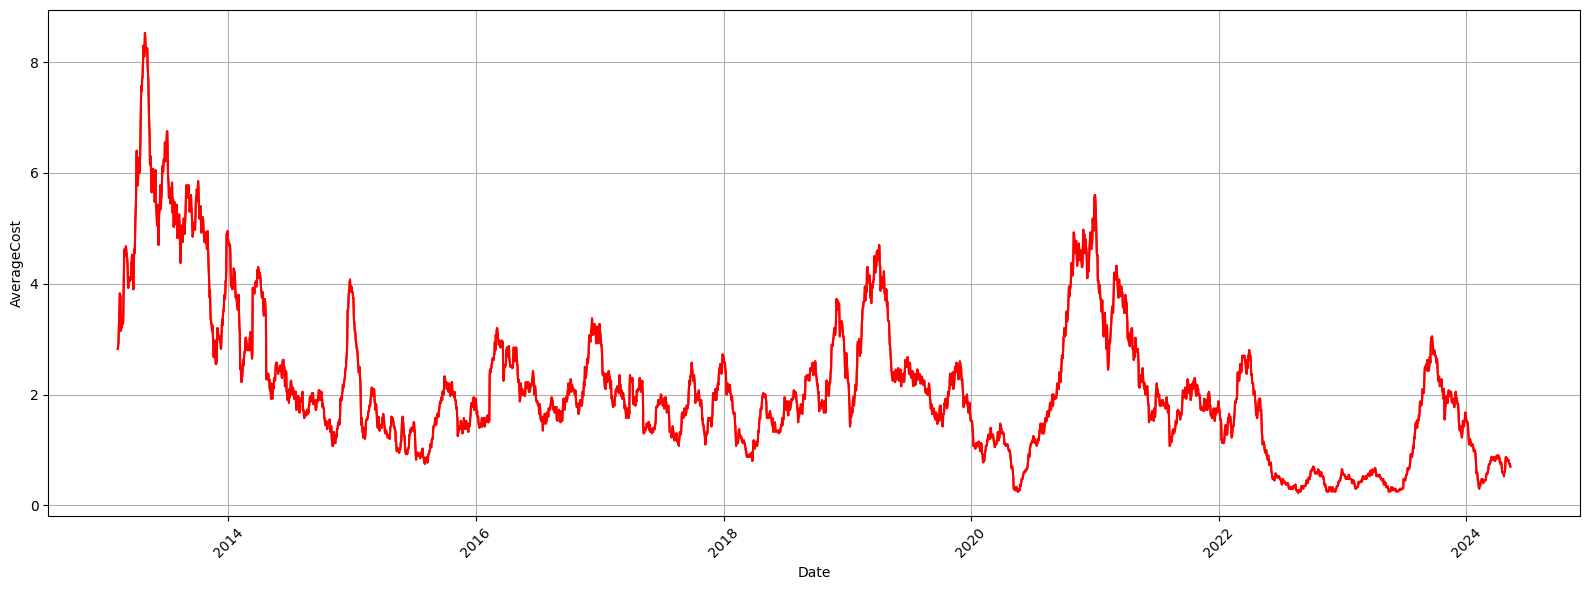

In [ ]:
Temp = SS[['dt','CountContracts']]
plt.figure(figsize=(16,6))
#plt.plot(Temp['dt'], Temp['tisa_spacedesign'], marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('AverageCost')

plt.xticks(rotation=45)
smoothed = Temp['CountContracts'].rolling(window=40).mean()
plt.plot(Temp['dt'], smoothed, marker='', linestyle='-', color='red')

plt.grid(True)
plt.tight_layout()
plt.show()

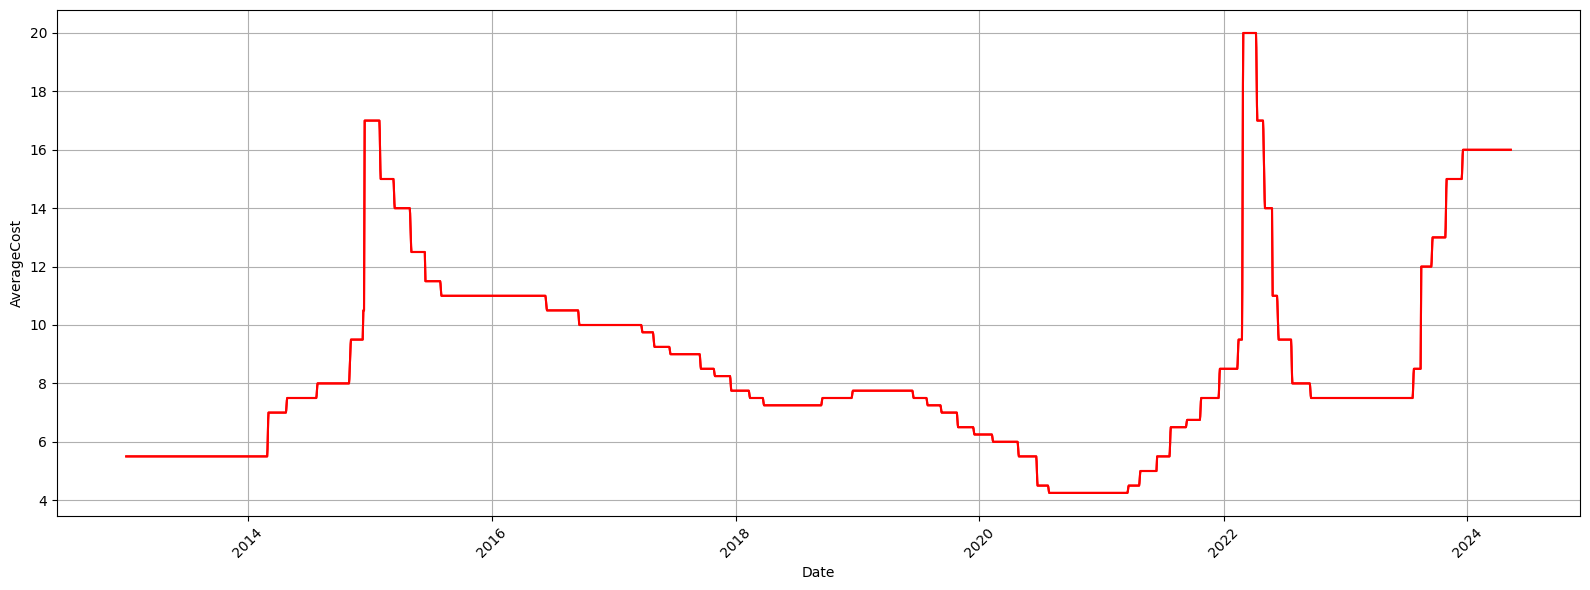

In [ ]:
Temp = SS[['dt','kr']]
plt.figure(figsize=(16,6))
#plt.plot(Temp['dt'], Temp['tisa_spacedesign'], marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('AverageCost')

plt.xticks(rotation=45)
smoothed = Temp['kr'].rolling(window=2).mean()
plt.plot(Temp['dt'], smoothed, marker='', linestyle='-', color='red')

plt.grid(True)
plt.tight_layout()
plt.show()

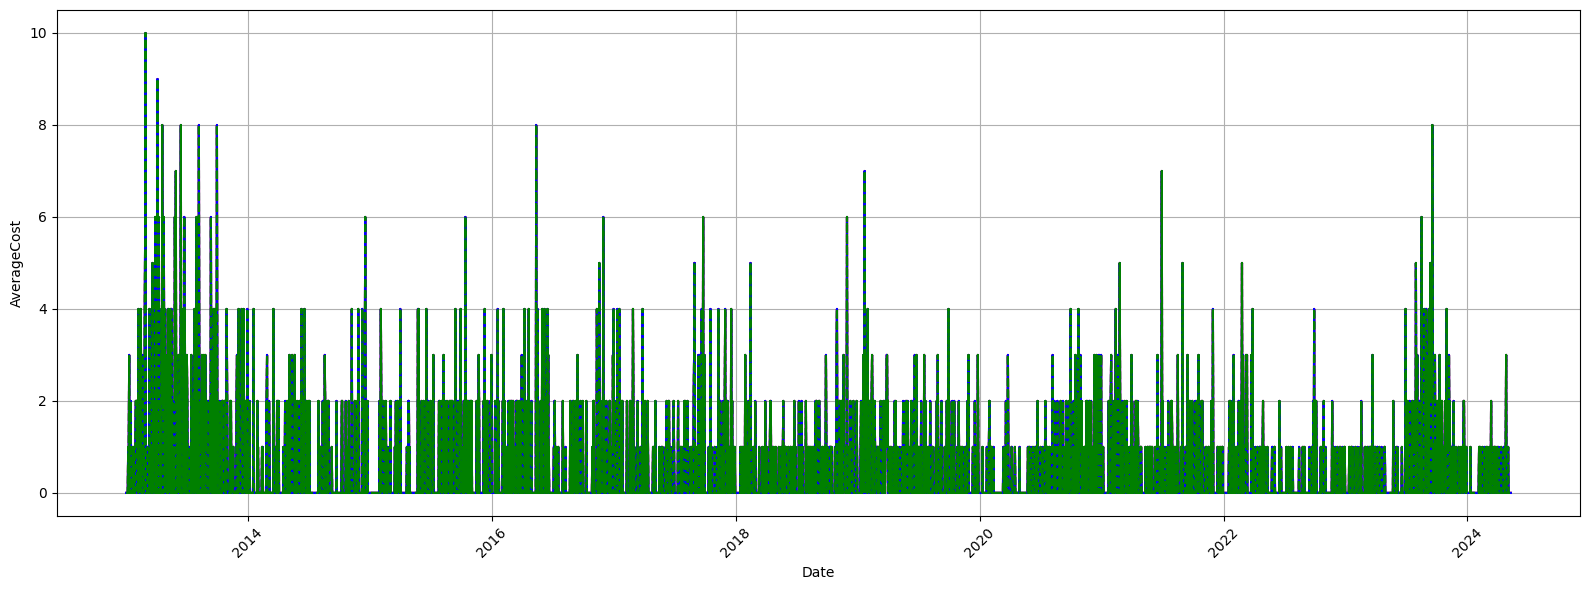

In [ ]:
Temp = SS[['dt','TwoRoom', 'OneRoom', 'ThreeRoom']]
plt.figure(figsize=(16,6))
#plt.plot(Temp['dt'], Temp['tisa_spacedesign'], marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('AverageCost')

plt.xticks(rotation=45)
smoothed = Temp['TwoRoom'].rolling(window=1).mean()
plt.plot(Temp['dt'], smoothed, marker='', linestyle='-', color='red')
smoothed1 = Temp['TwoRoom'].rolling(window=1).mean()
plt.plot(Temp['dt'], smoothed1, marker='', linestyle='-', color='blue')
smoothed2 = Temp['TwoRoom'].rolling(window=1).mean()
plt.plot(Temp['dt'], smoothed2, marker='', linestyle='--', color='green')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# multivariate multi-step data preparation
from numpy import array
from numpy import hstack
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(len(sequences)):
    # find the end of this pattern
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out-1
    # check if we are beyond the dataset
    if out_end_ix > len(sequences):
    break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
print(X[i], y[i])
